In [1]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import xarray as xr
import cmocean.cm as cm

In [2]:
## import the entire dataset
phys_rivers = xr.open_dataset('01mar23_3D_01/SalishSea_1h_20230301_20230301_grid_T.nc')
fw_rivers = xr.open_dataset('01mar23_3D_01/SalishSea_1h_20230301_20230301_rivr_T.nc')
uvels = xr.open_dataset('01mar23_3D_01/SalishSea_1h_20230301_20230301_grid_U.nc')
vvels = xr.open_dataset('01mar23_3D_01/SalishSea_1h_20230301_20230301_grid_V.nc')
# wvels = xr.open_dataset('01mar23_fix/SalishSea_1h_20230401_20230401_grid_W.nc')

In [7]:
phys_old = xr.open_dataset('../../../../../../../../results2/SalishSea/nowcast-green.202111/01mar23/SalishSea_1h_20230301_20230301_grid_T.nc')

In [ ]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

## Surface salinity and temperature

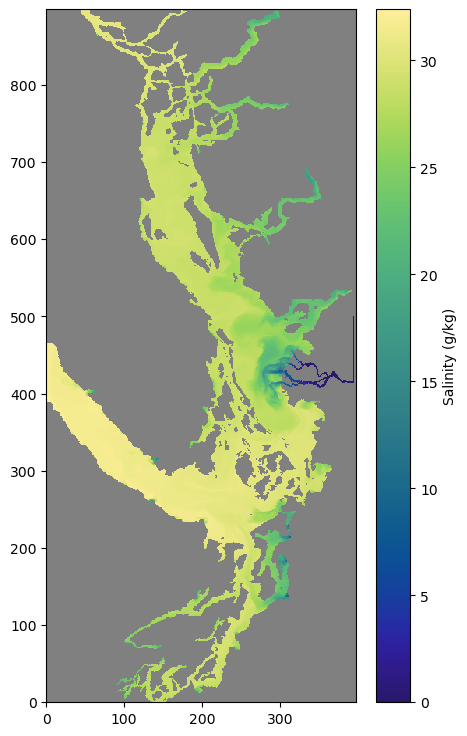

In [8]:
cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_rivers.vosaline[1, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')

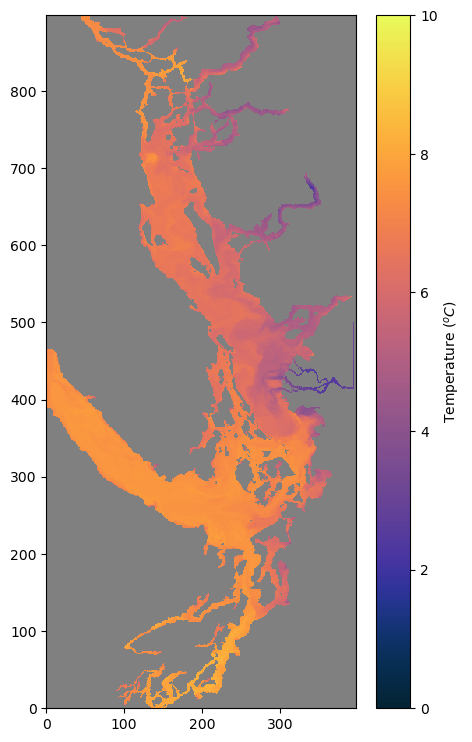

In [34]:
cmap = cm.thermal
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temp = np.ma.masked_array(phys_rivers.votemper[1, 0], mask=tmask[0])
colours = ax.pcolormesh(temp, vmin=0, vmax=10, cmap=cmap)  #TODO: survey an entire year to pick the best vmax in the Salish Sea
cb = fig.colorbar(colours, ax=ax)
cb.set_label(r'Temperature ($^o C$)')

## Check salinity and temp against the base run

Text(0.5, 1.0, 'Timestep = 23')

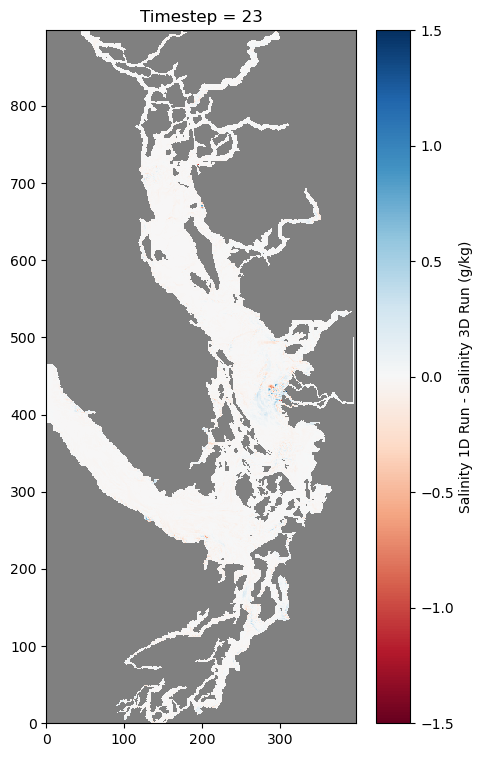

In [9]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_rivers.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-1.5,vmax=1.5)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity 1D Run - Salinity 3D Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

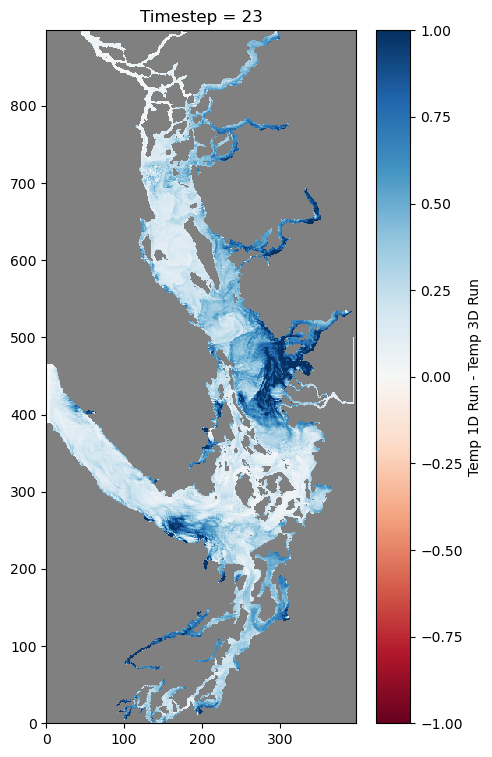

In [10]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temperature = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_rivers.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(temperature, cmap=cmap, vmin=-1, vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Temp 1D Run - Temp 3D Run')
ax.set_title('Timestep = {}'.format(str(tstep)))

## Rivers

In [11]:
import salishsea_tools.river_202108 as rivers

In [12]:
def river_box(w_shed, r_call, box_side):  #TODO: change this to include the other river that falls off the edge
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 898-box_side*2
        river_range[1] = 898

    return river_range

In [13]:
box_size = 30
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)

In [72]:
gridX = np.arange(Nooksack[0],Nooksack[1])
gridY = np.arange(Nooksack[2],Nooksack[3])

# Visualizations of dye

In [77]:
fudge = .0001 # need to add very small number here because we can't do log of zero without weird effects in the masking

## Surface plan views

Text(0.5, 1.0, 'Timestep = 23')

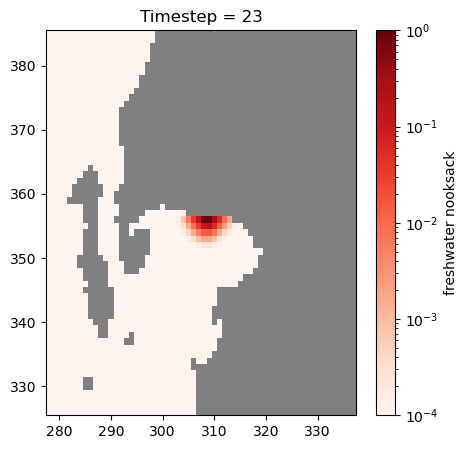

In [86]:
X = gridX
Y = gridY
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

tstep = 23

cmap = mpl.colormaps['Reds']
cmap.set_bad('grey')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge, vmax=1), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

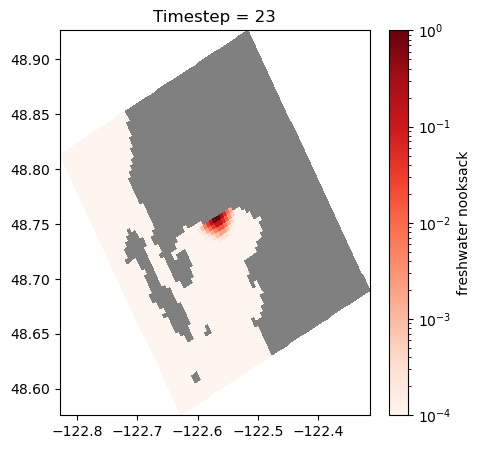

In [87]:
X = fw_rivers.nav_lon[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]
Y = fw_rivers.nav_lat[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge  # need to add very small number here because we can't do log of zero without weird effects in the masking

tstep = 23

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge, vmax=1), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Timestep = {}'.format(str(tstep)))

## Side slice views

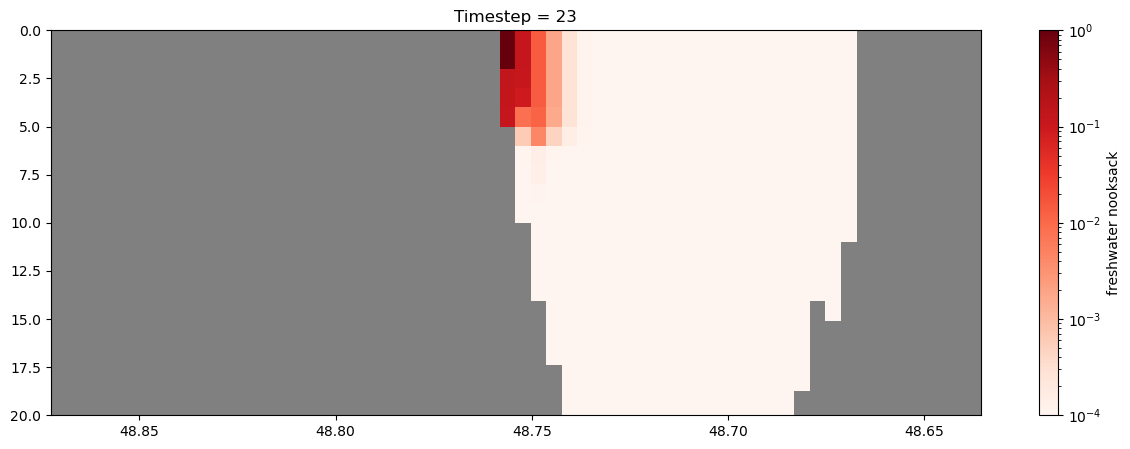

In [88]:
# vertical slice

tstep = 23

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, :, rivers.prop_dict['fraser']['Nooksack']['j']], mask=tmask[:, :, rivers.prop_dict['fraser']['Nooksack']['j']])

X = fw_rivers.nav_lat[Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']+1]
Y = fw_rivers.deptht
Z = freshwater[:, Nooksack[0]:Nooksack[1]] + fudge

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge, vmax=1), cmap=cmap)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

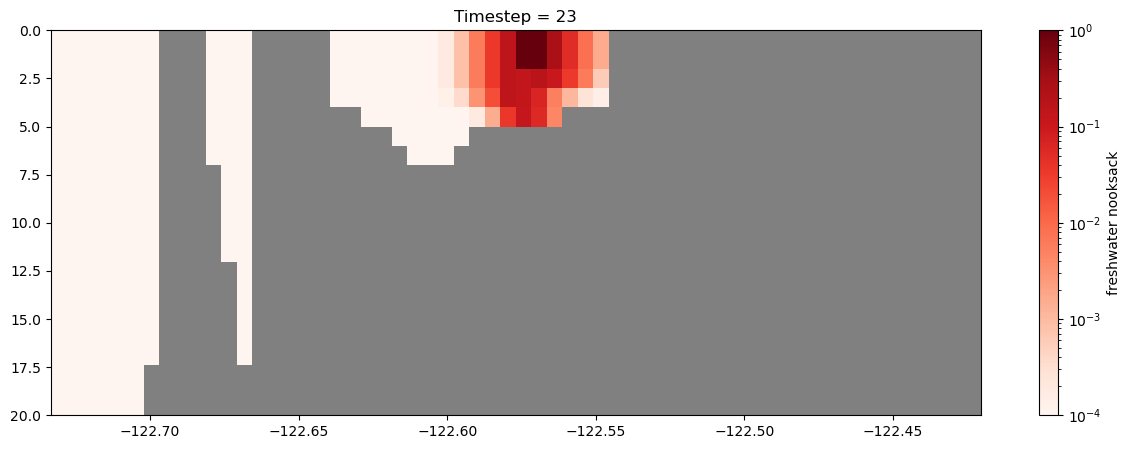

In [90]:
# horizontal slice

tstep = 23

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, rivers.prop_dict['fraser']['Nooksack']['i'], :], mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], :])

X = fw_rivers.nav_lon[rivers.prop_dict['fraser']['Nooksack']['i']+1, Nooksack[2]:Nooksack[3]]
Y = fw_rivers.deptht
Z = freshwater[:, Nooksack[2]:Nooksack[3]] + fudge

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge, vmax=1), cmap=cmap)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Plan Sum \nTimestep = 23')

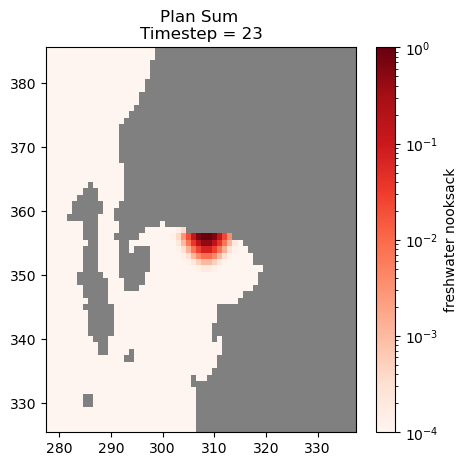

In [94]:
tstep = 23

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :], mask=tmask[:])
freshwater = freshwater.sum(axis=0)

X = gridX
Y = gridY
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge, vmax=1), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Plan Sum \nTimestep = {}'.format(str(tstep)))

In [19]:
# tstep = 23

# cmap = mpl.colormaps['Reds']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :], mask=tmask[:])
# freshwater = freshwater.sum(axis=0)
# colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater nooksack')
# u_vels = np.ma.masked_array(uvels.vozocrtx[tstep, 0], mask=tmask[0])
# v_vels = np.ma.masked_array(vvels.vomecrty[tstep, 0], mask=tmask[0])
# ax.quiver(X, Y, u_vels, v_vels, scale=5.5)
# ax.set_title('Plan Sum and Velocities\nTimestep = {}'.format(str(tstep)))
# ax.set_ylim(Nooksack[0], Nooksack[1])
# ax.set_xlim(Nooksack[2], Nooksack[3])



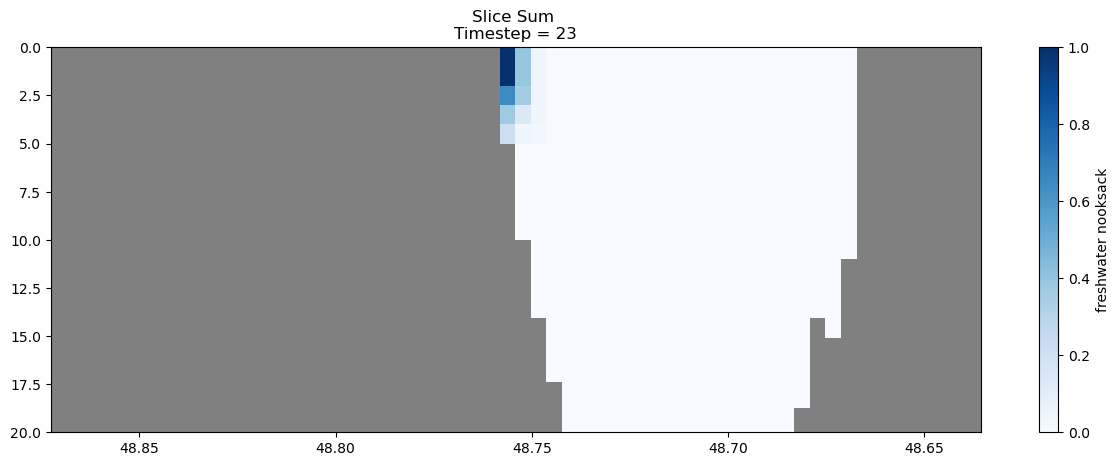

In [20]:
# vertical slice sum
sum_size = 30
tstep = 23

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, :, :], mask=tmask[:, :, :])

X = fw_rivers.nav_lat[Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']+1]
Y = fw_rivers.deptht
Z = np.ma.masked_array(freshwater[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']-sum_size:rivers.prop_dict['fraser']['Nooksack']['j']+sum_size].sum(axis=2), mask=tmask[:, Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']])

colours = ax.pcolormesh(X, Y, Z, cmap=cmap, vmin=0, vmax=1)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Slice Sum \nTimestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

/tmp/ipykernel_757860/2691822651.py:14: RuntimeWarning: divide by zero encountered in log
  colours = ax.pcolormesh(X, Y, np.log(Z), vmin=-20, vmax=0, cmap=cmap)


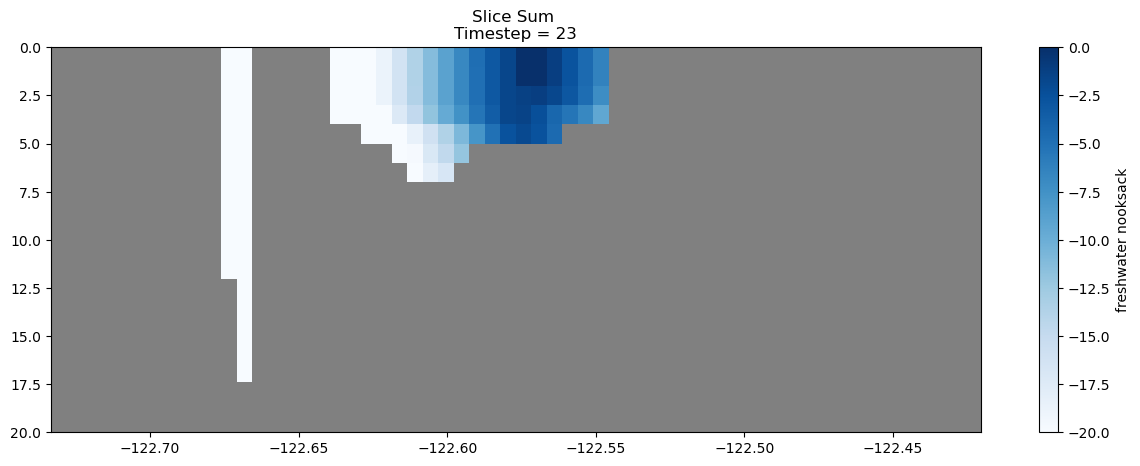

In [21]:
# horizontal slice sum
sum_size = 30
tstep = 23

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(fw_rivers.nooksack_river[tstep, :, :, :], mask=tmask[:, :, :])

X = fw_rivers.nav_lon[rivers.prop_dict['fraser']['Nooksack']['i']+1, Nooksack[2]:Nooksack[3]]
Y = fw_rivers.deptht
Z = np.ma.masked_array(freshwater[:, rivers.prop_dict['fraser']['Nooksack']['i']-sum_size:rivers.prop_dict['fraser']['Nooksack']['i']+sum_size, Nooksack[2]:Nooksack[3]].sum(axis=1), mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], Nooksack[2]:Nooksack[3]])

colours = ax.pcolormesh(X, Y, np.log(Z), vmin=-20, vmax=0, cmap=cmap)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')
ax.set_title('Slice Sum \nTimestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()

In [23]:
# tstep = 23

# cmap = cm.curl
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# # u_vels = np.ma.masked_array(uvels.vozocrtx[tstep, 0], mask=tmask[0])
# # v_vels = np.ma.masked_array(vvels.vomecrty[tstep, 0], mask=tmask[0])
# ax.quiver(u_vels_ds, v_vels_ds)
# ax.set_title('Velocity \nTimestep = {}'.format(str(tstep)))
# # ax.set_ylim(Nooksack[0], Nooksack[1])
# # ax.set_xlim(Nooksack[2], Nooksack[3])

(336.0, 376.0)

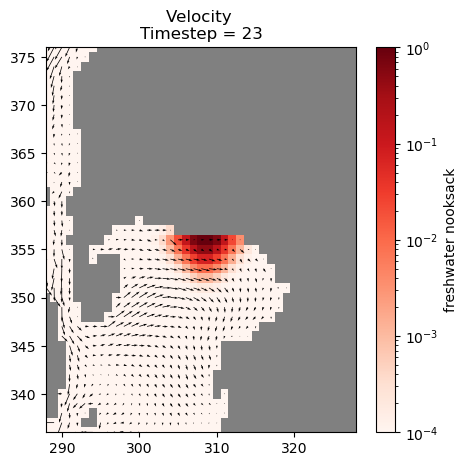

In [107]:
zoom_fac = 10
tstep = 23

cmap = mpl.colormaps['Reds']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

u_vels = np.ma.masked_array(uvels.vozocrtx[tstep, 0], mask=tmask[0])[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]
v_vels = np.ma.masked_array(vvels.vomecrty[tstep, 0], mask=tmask[0])[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]]

X = gridX
Y = gridY
Z = freshwater[Nooksack[0]:Nooksack[1], Nooksack[2]:Nooksack[3]] + fudge

colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge, vmax=1), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nooksack')

ax.quiver(X, Y, u_vels, v_vels, scale=5)
ax.set_title('Velocity \nTimestep = {}'.format(str(tstep)))
ax.set_xlim(Nooksack[0]+zoom_fac, Nooksack[1]-zoom_fac)
ax.set_ylim(Nooksack[2]+zoom_fac, Nooksack[3]-zoom_fac)

In [54]:
# tstep = 23

# cmap = cm.curl
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# u_vels = np.ma.masked_array(uvels.vozocrtx[tstep, 0], mask=tmask[0])
# v_vels = np.ma.masked_array(vvels.vomecrty[tstep, 0], mask=tmask[0])

# X = fw_rivers.nav_lon[rivers.prop_dict['fraser']['Nooksack']['i']+1, :]
# Y = fw_rivers.nav_lat[:, rivers.prop_dict['fraser']['Nooksack']['j']+1]

# # ax.quiver(X, Y, u_vels, v_vels, scale=5.5)
# ax.quiver(X, Y, u_vels, v_vels, scale=15)
# ax.set_title('Velocity \nTimestep = {}'.format(str(tstep)))
# ax.set_xlim(fw_rivers.nav_lon[rivers.prop_dict['fraser']['Nooksack']['i']+1, Nooksack[0]], fw_rivers.nav_lon[rivers.prop_dict['fraser']['Nooksack']['i']+1, Nooksack[1]])
# ax.set_ylim(fw_rivers.nav_lat[Nooksack[2], rivers.prop_dict['fraser']['Nooksack']['j']+1], fw_rivers.nav_lat[Nooksack[3], rivers.prop_dict['fraser']['Nooksack']['j']+1])

(326.0, 386.0)

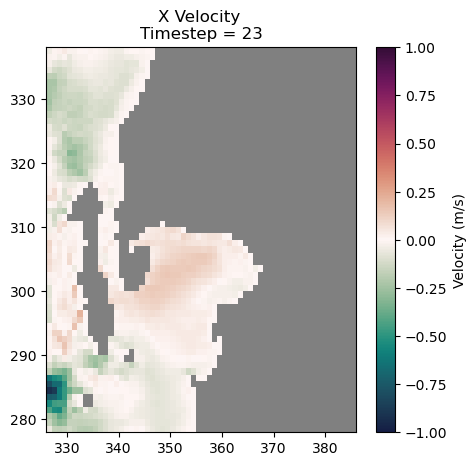

In [ ]:
tstep = 23

cmap = cm.curl
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(uvels.vozocrtx[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=-1, vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Velocity (m/s)')
ax.set_title('X Velocity \nTimestep = {}'.format(str(tstep)))
ax.set_ylim(Nooksack[0], Nooksack[1])
ax.set_xlim(Nooksack[2], Nooksack[3])

(326.0, 386.0)

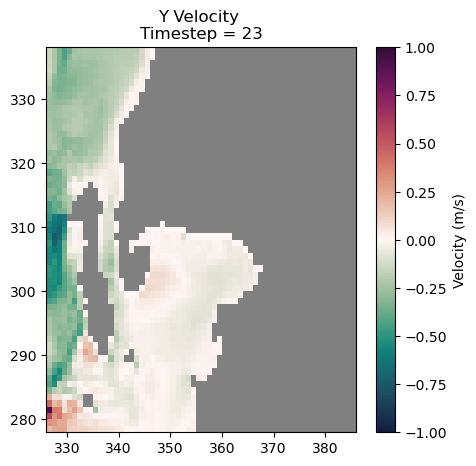

In [ ]:
tstep = 23

cmap = cm.curl
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(vvels.vomecrty[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=-1, vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Velocity (m/s)')
ax.set_title('Y Velocity \nTimestep = {}'.format(str(tstep)))
ax.set_ylim(Nooksack[0], Nooksack[1])
ax.set_xlim(Nooksack[2], Nooksack[3])

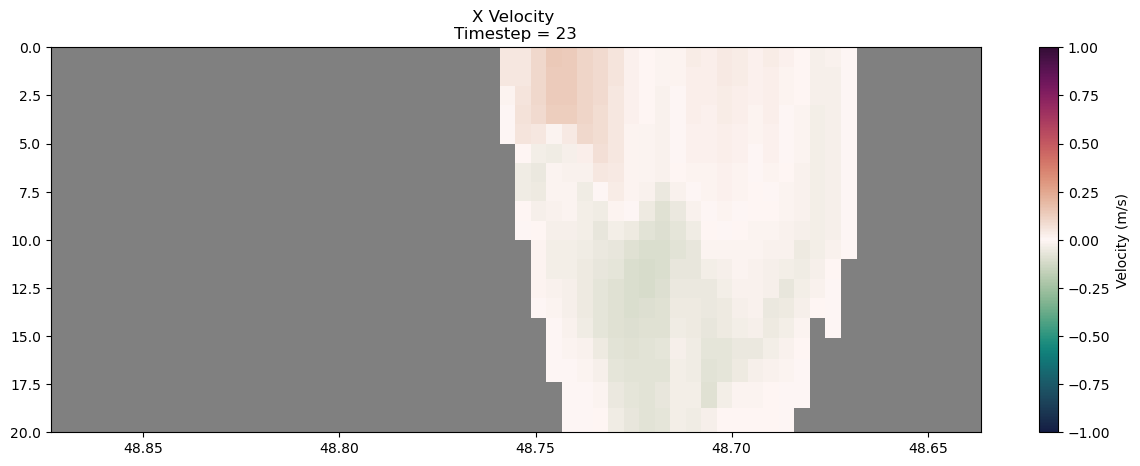

In [ ]:
# vertical slice

tstep = 23

cmap = cm.curl
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(uvels.vozocrtx[tstep, :, :, rivers.prop_dict['fraser']['Nooksack']['j']], mask=tmask[:, :, rivers.prop_dict['fraser']['Nooksack']['j']])

X = uvels.nav_lat[Nooksack[0]:Nooksack[1], rivers.prop_dict['fraser']['Nooksack']['j']+1]
Y = uvels.depthu
Z = freshwater[:, Nooksack[0]:Nooksack[1]]

colours = ax.pcolormesh(X, Y, Z, cmap=cmap, vmin=-1, vmax=1)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('Velocity (m/s)')
ax.set_title('X Velocity \nTimestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

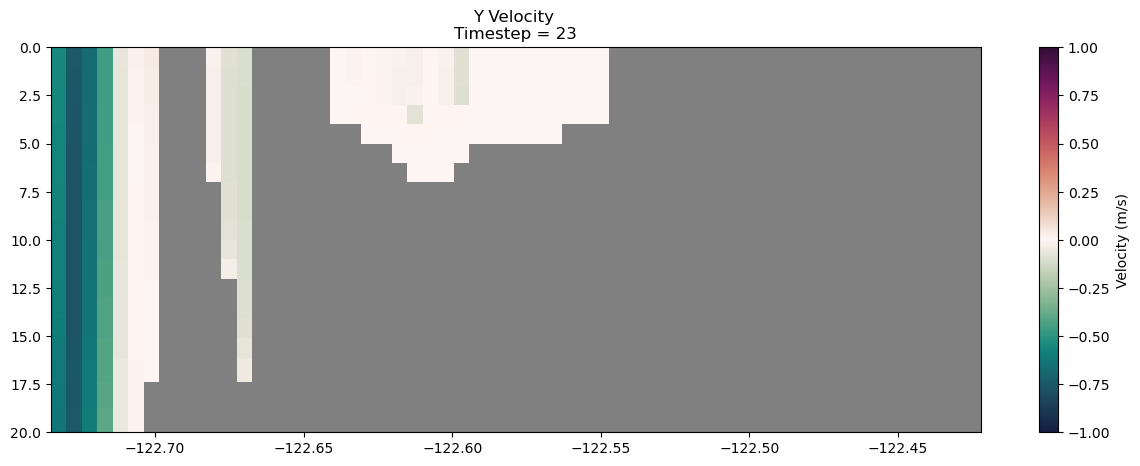

In [ ]:
# horizontal slice

tstep = 23

cmap =  cm.curl
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
freshwater = np.ma.masked_array(vvels.vomecrty[tstep, :, rivers.prop_dict['fraser']['Nooksack']['i'], :], mask=tmask[:, rivers.prop_dict['fraser']['Nooksack']['i'], :])

X = vvels.nav_lon[rivers.prop_dict['fraser']['Nooksack']['i']+1, Nooksack[2]:Nooksack[3]]
Y = vvels.depthv
Z = freshwater[:, Nooksack[2]:Nooksack[3]]

colours = ax.pcolormesh(X, Y, Z, cmap=cmap, vmin=-1, vmax=1)

cb = fig.colorbar(colours, ax=ax)
cb.set_label('Velocity (m/s)')
ax.set_title('Y Velocity \nTimestep = {}'.format(str(tstep)))
ax.set_ylim(0, 20)

plt.gca().invert_yaxis()